In [101]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [102]:
import numpy as np
import pandas as pd

In [103]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [104]:
# Python SQL toolkit and Object Relational Mapper.
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [105]:
# In order to connect to our SQLite database, we need to use the create_engine() function.
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [106]:
# reflect an existing database into a new model with the automap_base() function.
Base = automap_base()

# reflect the tables with the prepare() function.
Base.prepare(engine, reflect=True)

In [107]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [108]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [109]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

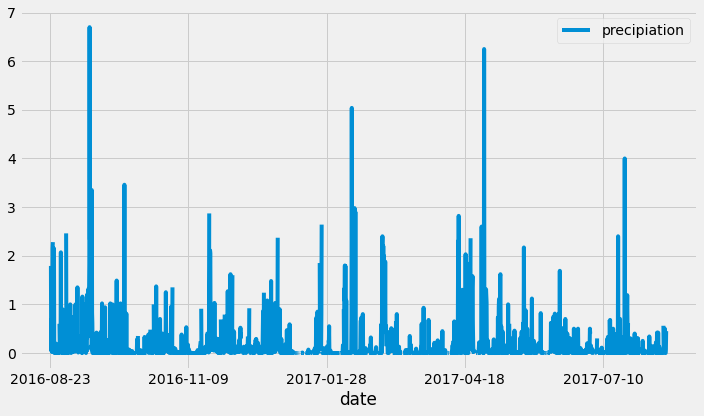

In [110]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
# Since we only want to see the most recent data, we need to filter out all of the data that is older than a year from the last record date.
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# print(results.all())

# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(results, columns=['date','precipiation'])

# Sort the dataframe by date
# Use the set_index() Function
# We can use the variable inplace to specify whether or not we want to create a new DataFrame.
# By setting inplace=True, we're saying that we do not want to create a new DataFrame with the modified specifications.
results_df.set_index(results_df['date'], inplace=True)

# Because we are using the date as the index, the DataFrame has two date columns, which is confusing. 
# So we'll print the DataFrame without the index so we can see just the date and precipitation.
# First we'll convert the DataFrame to strings, and then we'll set our index to "False." 
# This will allow us to print the DataFrame without the index.

# All of the dates are now in order. 
results_df = results_df.sort_index()
# print(results_df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot(figsize=(10,6))
plt.tight_layout()

In [111]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()

,precipiation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [113]:
results_df

,date,precipiation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


In [47]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [51]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# In the left column is the station ID, and on the right are the counts for each station.

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [58]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

# The results show that the low (minimum) temperature is 54 degrees, the high (maximum) temperature is 85 degrees, 
# and the average temperature is approximately 71.7 degrees.

[(54.0, 85.0, 71.66378066378067)]

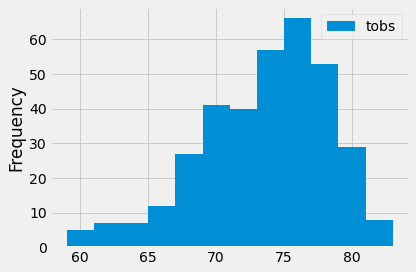

In [73]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
# print(results)

# Convert the results to a DataFrame to see better the results
results_df = pd.DataFrame(results, columns=['tobs'])
results_df.head()

# To create the histogram, 
# we need to use the plot() function and the hist() function and add the number of bins as a parameter. 
# "Bin" refers to each rectangular column in the plot, as shown below.
results_df.plot.hist(bins=12)

# Using plt.tight_layout(), we can compress the x-axis labels so that they fit into the box holding our plot.
plt.tight_layout()

# We can infer that a vast majority of the observations were over 67 degrees. 
# If you count up the bins to the right of 67 degrees, you will get about 325 days where it was over 67 degrees when the temperature was observed.


In [98]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    # start_date_1 = dt.datetime.strftime(start_date,'%Y-%m-%d')
    # end_date_1 = dt.datetime.strftime(end_date,'%Y-%m-%d')
    temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).all()
    return temps 

# Por revisar.

In [99]:
print(calc_temps('2016-08-01','2017-08-01'))

[(58.0, 87.0, 74.64288840262581)]


# Challenge